# Задание 1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, sin, log

In [2]:
data = np.fromfile("var05_z1.bin", dtype=np.int16)
print(data[:20])

[228 208 222 154 234 134 152 254 261 151 207 125  91 109 222 364 153 243
 324 162]


In [3]:
t_axe = []
t_axe = np.arange(0,len(data)/1000, 0.001)
print(len(t_axe))

1800000


([<matplotlib.axis.XTick at 0x2d192d682b0>,
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800'),
  Text(900.0, 0, '900'),
  Text(1000.0, 0, '1000'),
  Text(1100.0, 0, '1100'),
  Text(1200.0, 0, '1200'),
  Text(1300.0, 0, '1300'),
  Text(1400.0, 0, '1400'),
  Text(1500.0, 0, '1500'),
  Text(1600.0, 0, '1600'),
  Text(1700.0, 0, '1700'),
  Text(1800.0, 0, '1800')])

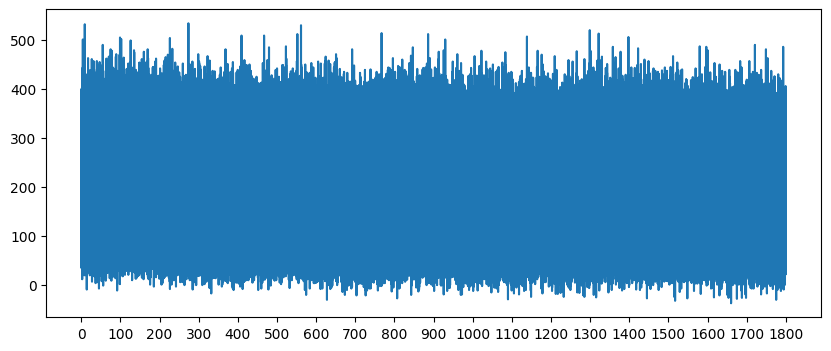

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(t_axe,data)
plt.xticks(np.arange(min(t_axe),max(t_axe)+0.1,100))


In [5]:
s = 0
for i in range(len(t_axe[:10001])): s += data[i]
data_av = [s/10001]
for i in range(5000,len(t_axe)-5000):
    data_av +=[(s-data[i-5000] + data[i+5000])/10001]

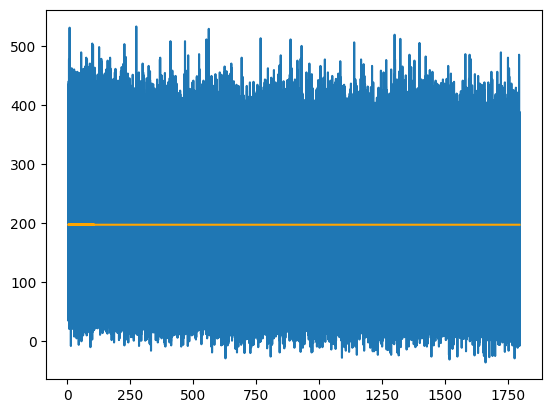

In [6]:
plt.plot(t_axe[5000:len(t_axe)-5000+1],data[5000:len(t_axe)-5000+1])
plt.plot(t_axe[5000:len(t_axe)-5000+1],data_av, color = "orange")

## Детрендирование

In [7]:
def sum_pow(x, p):
    s=0
    for elem in x:
        s+=elem**p
    return s

def sum2_pow(x, y, p):
    s=0
    for i in range(len(x)):
        s+=y[i]*x[i]**p
    return s

def f(x):
    t=[coef[i]*x**i for i in range(len(coef))]
    s=0
    for elem in t:
        s+=elem
    return s

m=5
A=np.array([[sum_pow(t_axe, i+j) for i in range(m) ] for j in range(m)])
B=np.array([ sum2_pow(t_axe, data, i) for i in range(m) ])
X=np.linalg.solve(A, B)
print(X)

global coef
coef=X

[ 2.04510980e+02 -4.45511133e-02  2.49632567e-05  4.16311184e-09
 -5.50681626e-12]


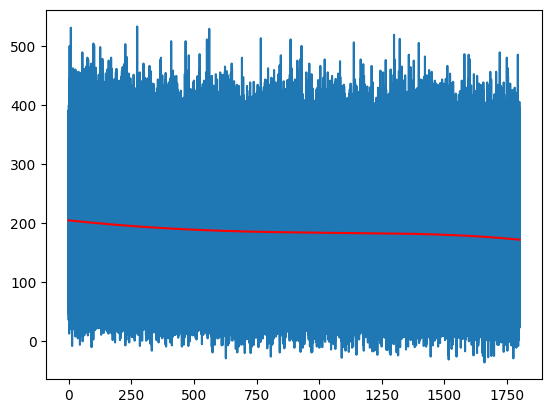

In [8]:
plt.plot(t_axe,data)
plt.plot(t_axe,f(t_axe), color = "red") #тренд методом апроксимации степенным полиномом

In [9]:
detrand = []

for i in range(1,len(t_axe)):
    detrand += [data[i] - f(t_axe[i-1])]

In [10]:
s = 0
for i in range(len(t_axe[:10001])): s += detrand[i]
data_av = [s/10001]
for i in range(5000,len(t_axe)-5000-1):
    data_av +=[(s-detrand[i-5000] + detrand[i+5000])/10001]

In [11]:
A=np.array([[sum_pow(t_axe[5000:len(t_axe)-5000], i+j) for i in range(m) ] for j in range(m)])
B=np.array([ sum2_pow(t_axe[5000:len(t_axe)-5000], data_av, i) for i in range(m) ])
X=np.linalg.solve(A, B)
print(X)

coef=X

[-7.21406621e+00 -6.07251938e-07  1.08047697e-09 -7.26259317e-13
  1.63063998e-16]


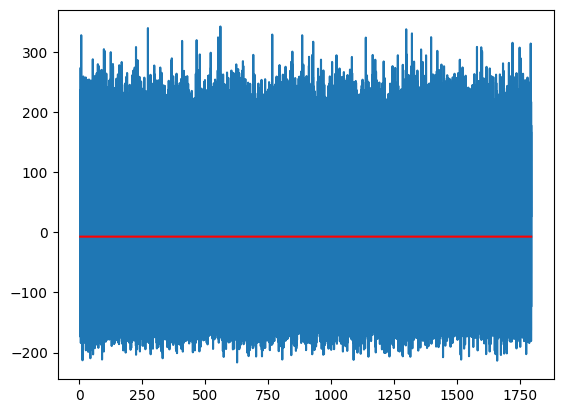

In [12]:
plt.plot(t_axe[5000:len(t_axe)-5000+1],detrand[5000:len(t_axe)-5000+1])
plt.plot(t_axe[5000:len(t_axe)-5000],f(t_axe[5000:len(t_axe)-5000]), color = "red")

# Задание 2

In [4]:
def bar_han_win(n,N):
    return 0.62 - 0.48*abs(n/(N-1) - 0.5) - 0.38*cos(2*np.pi*n/(N-1))

In [26]:
data = np.fromfile("var05_z2.bin", dtype=np.int8)
for i in range(len(data)):
    data[i] = data[i] * bar_han_win(i,len(data))
data_s = np.fft.fft(data)
print(len(data_s))

8000


In [27]:
f_axe = []
f_axe = np.fft.fftfreq(len(data),1000)
f_axe = np.fft.fftshift(f_axe)
print(len(f_axe))

8000


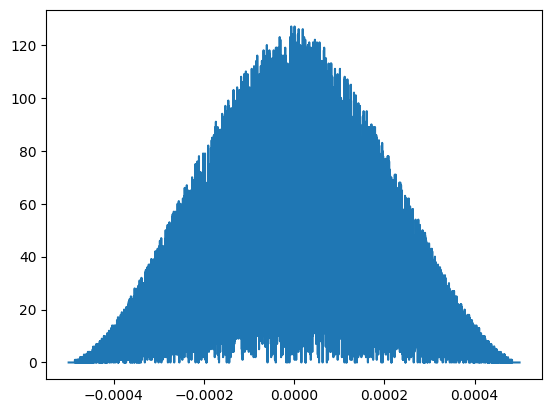

In [28]:
plt.plot(f_axe, abs(data))

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


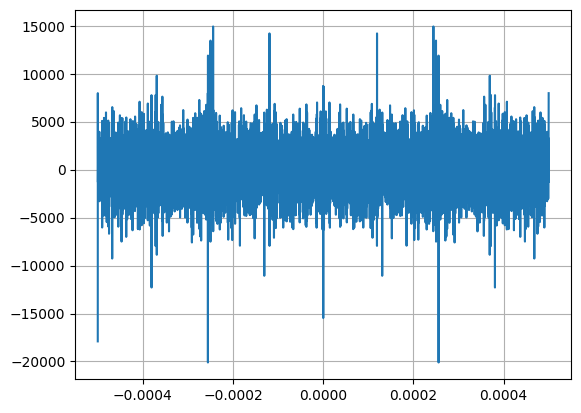

In [44]:
plt.plot(f_axe, ((data_s)))
#plt.yticks(np.arange(0,20000+0.1,2000))
plt.grid()

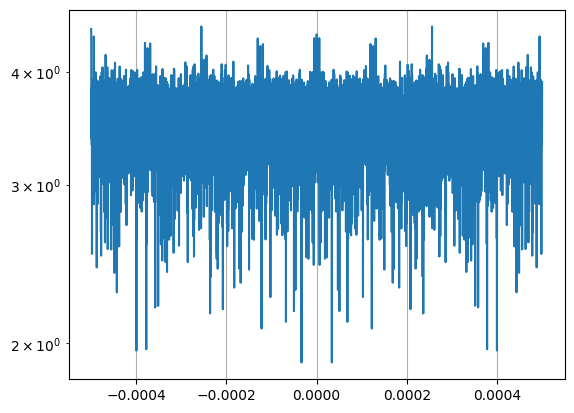

In [45]:
plt.plot(f_axe, abs(np.log10(data_s)))
#plt.plot(f_axe, abs(data_s), "ro", color="red")
plt.yticks(np.arange(0,20000+0.1,2000))
plt.yscale('log')
plt.grid()

In [18]:
count = 0
garm_fr = [] #частот гармоник в сигнале
for i in range(len(data_s)):
    if abs(data_s[i]) > 10000:
        count += 1
        garm_fr +=[f_axe[i]]
print(garm_fr)
print(count)

[-0.0005, -0.000494375, -0.00049425, -0.000494125, -0.00038074999999999996, -0.000375, -0.000374875, -0.00036925, -0.000369125, -0.00025575, -0.000255625, -0.00025, -0.00024425, -0.00013075, -0.000125, -0.00011925, -0.000119125, -5.875e-06, -5.75e-06, -5.6249999999999995e-06, 0.0, 5.6249999999999995e-06, 5.75e-06, 5.875e-06, 0.000119125, 0.00011925, 0.000125, 0.00013075, 0.00024425, 0.00025, 0.000255625, 0.00025575, 0.000369125, 0.00036925, 0.000374875, 0.000375, 0.00038074999999999996, 0.000494125, 0.00049425, 0.000494375]
40


# Задание 3


In [13]:
data = np.fromfile("var05_z3.bin", dtype=np.double)

for i in range(len(data)):
    data[i] = data[i] * bar_han_win(i,len(data))

data_s = np.fft.fft(data)
print(len(data_s))

10000


In [14]:
f_axe = []
f_axe = np.fft.fftfreq(len(data_s),1000)
f_axe = np.fft.fftshift(f_axe)
print(len(f_axe))

t_axe = []
t_axe = np.arange(0,len(data_s)/1000, 0.001)
print(len(t_axe))

10000
10000


(array([[2.26674404e-08, 2.29207371e-08, 2.31754605e-08, ...,
         5.15665053e-08, 5.12522618e-08, 5.09365060e-08],
        [1.03824737e-07, 1.04259709e-07, 1.04691888e-07, ...,
         6.31094077e-08, 6.28218442e-08, 6.25356298e-08],
        [1.42748550e-07, 1.42918339e-07, 1.43083120e-07, ...,
         5.71623885e-09, 5.68932197e-09, 5.66281767e-09],
        ...,
        [2.78894911e-08, 2.81513306e-08, 2.84140019e-08, ...,
         1.74904844e-07, 1.74345045e-07, 1.73783005e-07],
        [7.01347740e-09, 7.06798571e-09, 7.12192468e-09, ...,
         1.02152644e-07, 1.01810721e-07, 1.01467025e-07],
        [1.95939891e-09, 1.94850924e-09, 1.93775705e-09, ...,
         1.37492478e-08, 1.38822187e-08, 1.40148373e-08]]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,

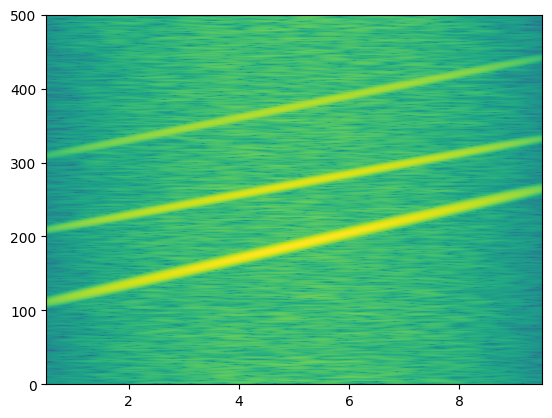

In [15]:
plt.specgram(data, NFFT=1000, noverlap=999 ,Fs = 1000)
#plt.plot(f_axe, data_s,"ro", color="red")

In [16]:
def bar_han_win2(N):
    out = []
    for n in range(0,N): 
        out += [0.62 - 0.48*abs(n/(N-1) - 0.5) - 0.38*cos(2*np.pi*n/(N-1))]
    return out

In [17]:
T = 80.0     
Fs = 1000.0  
N = int(T * Fs) 
s = data
window_size = 1000  
overlap     = 999  

window = bar_han_win2(window_size)
windows = [s[i:i+window_size] * window for i in range(0, len(s)-window_size, window_size-overlap)]

spectrogram = [np.abs(np.fft.rfft(win))**2 for win in windows]

spectrogram = np.array(spectrogram).T

frequencies = np.fft.rfftfreq(window_size, d=1.0/Fs)
time = np.arange(len(spectrogram[0]))/ Fs

C:\Users\Admin\AppData\Local\Temp\ipykernel_8524\3264666214.py:1: UserWarning: shading value 'gourand' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(time, frequencies, 10000*np.log10(spectrogram), shading="gourand", cmap="viridis")


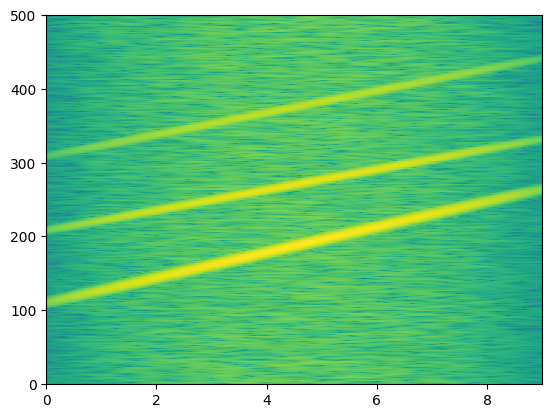

In [18]:
plt.pcolormesh(time, frequencies, 10000*np.log10(spectrogram), shading="gourand", cmap="viridis")